In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/Artificial Intelligence /CoLab /Dataset/game data.csv')

In [4]:
dataset.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [5]:
dataset.drop("Days", axis=1, inplace=True)
dataset.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [6]:
train_x=dataset.drop('Wear Jacket?',axis=1)
train_x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [7]:
train_y=dataset[['Wear Jacket?']]
train_y

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes
5,No
6,No
7,No


In [8]:
train_x.value_counts() #intersting , groupwise count

Outlook  Temprature  Routine
Cloudy   Cold        Indoor     1
                     Outdoor    1
         Warm        Indoor     1
                     Outdoor    1
Sunny    Cold        Indoor     1
                     Outdoor    1
         Warm        Indoor     1
                     Outdoor    1
Name: count, dtype: int64

In [9]:
train_x.Outlook.value_counts()

Outlook
Sunny     4
Cloudy    4
Name: count, dtype: int64

In [10]:
train_x.Temprature.value_counts()

Temprature
Cold    4
Warm    4
Name: count, dtype: int64

In [11]:
train_x.Routine.value_counts()

Routine
Indoor     4
Outdoor    4
Name: count, dtype: int64

In [12]:
train_x.isnull().sum()

Outlook       0
Temprature    0
Routine       0
dtype: int64

In [13]:
train_x=train_x.replace({'Cloudy':0,'Sunny':1,'Cold':1,'Warm':0,'Indoor':0,'Outdoor':1})
train_x

,Outlook,Temprature,Routine
0,1,1,Indoor
1,0,1,Indoor
2,0,0,1
3,1,1,1
4,0,1,1
5,1,0,1
6,0,0,Indoor
7,1,0,Indoor


In [14]:
train_x=train_x.replace({'Indoor':0,'Outdoor':1})
train_x

,Outlook,Temprature,Routine
0,1,1,Indoor
1,0,1,Indoor
2,0,0,1
3,1,1,1
4,0,1,1
5,1,0,1
6,0,0,Indoor
7,1,0,Indoor


In [30]:
a=train_x[['Routine'][0]][0]

for i in range(0,8):
  if train_x[['Routine'][0]][i]==a:
    train_x[['Routine'][0]][i]=0

<ipython-input-30-8dfb96a22097>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x[['Routine'][0]][i]=0
<ipython-input-30-8dfb96a22097>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x[['Routine'][0]][i]=0
<ipython-input-30-8dfb96a22097>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x[['Routine'][0]][i]=0
<ipython-input-30-8dfb96a22097>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [31]:
train_x

,Outlook,Temprature,Routine
0,1,1,0
1,0,1,0
2,0,0,1
3,1,1,1
4,0,1,1
5,1,0,1
6,0,0,0
7,1,0,0


In [35]:
tree_Clf=DecisionTreeClassifier()
# help(DecisionTreeClassifier)   #to know about the object we can call this help(obj) function

In [36]:
tree_Clf.fit(train_x,train_y) #training the decision tree

DecisionTreeClassifier()

In [38]:
tree_Clf.predict([[1,0,0]]) #input: {sunny,cold,indoor}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

[Text(0.4, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.625, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.375, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

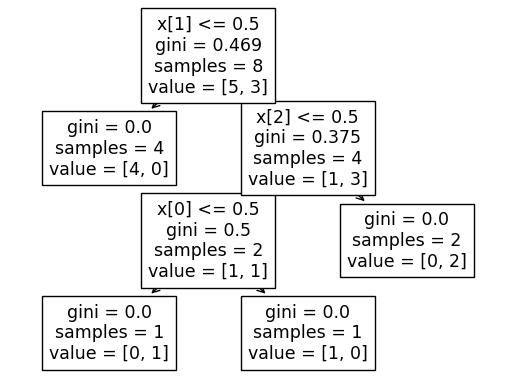

In [39]:
tree.plot_tree(tree_Clf)

[Text(0.4, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

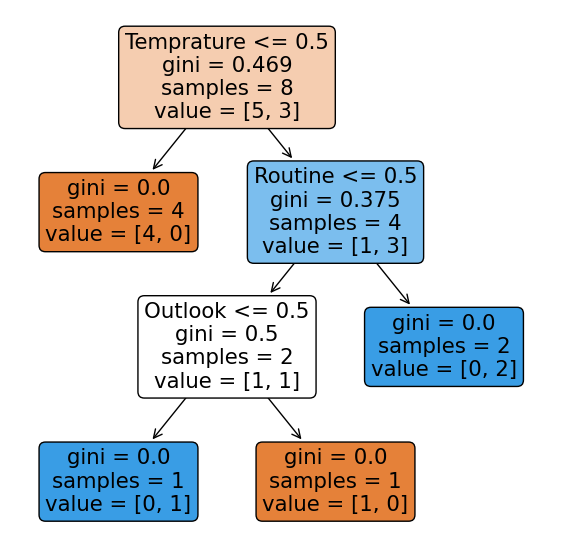

In [42]:
plt.figure(figsize=(7,7))
tree.plot_tree(tree_Clf,feature_names=train_x.columns, filled=True, rounded=True)